In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('df.csv',low_memory=False)

In [ ]:
df.head(10)

In [7]:
df.shape[0]

45000

In [8]:
df.shape[1]

1650

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Columns: 1650 entries, Info_PepID to feat_esm2_1280
dtypes: float64(1628), int64(11), object(11)
memory usage: 566.5+ MB


In [10]:
df.isnull().sum().sum()

0

In [11]:
df['Class'].value_counts(normalize=True)

-1    0.992622
 1    0.007378
Name: Class, dtype: float64

Text(0, 0.5, 'Frequency')

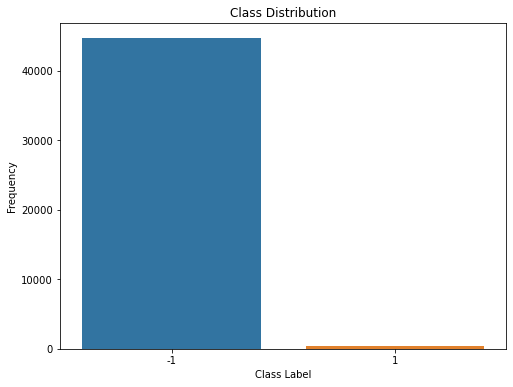

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.xlabel('Class Label')
plt.ylabel('Frequency')

In [13]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
feat_col=df.filter(like='feat_').columns
feature=df[feat_col]

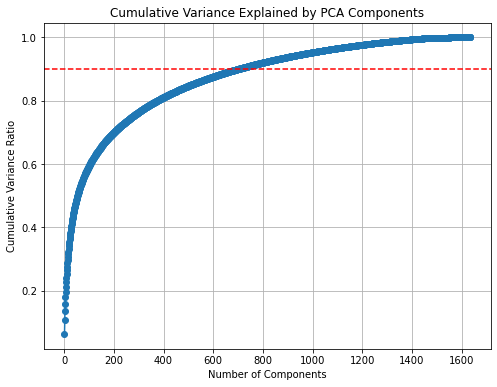

Number of components for 90% variance: 699


In [14]:
scaler=StandardScaler()
scaled_feat=scaler.fit_transform(feature)
pca = PCA()
pca.fit(scaled_feat)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance')
plt.title('Cumulative Variance Explained by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Ratio')
plt.grid(True)
plt.show()
print("Number of components for 90% variance:", np.where(cumulative_variance >= 0.90)[0][0] + 1)

In [15]:
unique_id = df['Info_PepID'].nunique()
u_id = df['Info_PepID'].unique()
print(unique_id)
print(u_id)

183
['XP_818691.1:1' 'XP_816461.1:1' 'XP_818927.1:1' 'XP_818927.1:6'
 'XP_818927.1:14' 'XP_818927.1:15' 'XP_816722.1:1' 'XP_808082.1:2'
 'XP_812312.1:1' 'XP_821609.1:1' 'XP_815234.1:2' 'XP_815234.1:3'
 'XP_815234.1:4' 'XP_815234.1:5' 'XP_815234.1:6' 'XP_810417.1:1'
 'XP_810604.1:2' 'XP_806512.1:1' 'XP_812753.1:1' 'XP_806620.1:1'
 'XP_819815.1:1' 'XP_819803.1:1' 'XP_811005.1:2' 'XP_817045.1:1'
 'XP_814064.1:1' 'XP_814064.1:3' 'XP_804664.1:1' 'XP_807703.1:1'
 'XP_809951.1:2' 'XP_812173.1:1' 'XP_814919.1:1' 'XP_814919.1:2'
 'XP_814919.1:3' 'XP_815926.1:1' 'XP_815926.1:3' 'XP_815926.1:5'
 'XP_815926.1:7' 'XP_815926.1:9' 'XP_815926.1:11' 'XP_815926.1:13'
 'XP_815926.1:15' 'XP_807526.1:1' 'XP_806088.1:1' 'XP_806088.1:3'
 'XP_806088.1:5' 'XP_817636.1:1' 'XP_817636.1:2' 'XP_817636.1:3'
 'XP_817636.1:4' 'XP_817636.1:5' 'XP_817636.1:7' 'XP_817636.1:10'
 'XP_817636.1:12' 'XP_817636.1:14' 'XP_817636.1:16' 'XP_817636.1:18'
 'XP_814493.1:1' 'XP_817834.1:1' 'XP_820098.1:2' 'XP_820098.1:4'
 'XP_820094

In [16]:
pca = PCA(n_components=0.90)
principal_components = pca.fit_transform(scaled_feat)
pc_df = pd.DataFrame(data=principal_components,
                         columns=[f'PC_{i+1}' for i in range(699)])
print("PCA performed with the optimal number of components.")

    # --- 4. Identify and Count Outliers using the IQR Method ---
outlier_indices = set()

    # Iterate through each Principal Component column
for column in pc_df.columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = pc_df[column].quantile(0.25)
        Q3 = pc_df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the outlier boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find the indices of outliers in the current column
        column_outliers = pc_df[(pc_df[column] < lower_bound) | (pc_df[column] > upper_bound)].index
        
        # Add the indices of these outliers to our main set
        outlier_indices.update(column_outliers)

    # The total number of unique outliers is the length of the set
num_outliers = len(outlier_indices)

print(f"\n✅ Total number of unique outliers found: {num_outliers}")


PCA performed with the optimal number of components.

✅ Total number of unique outliers found: 40953


!pip install --force-reinstall umap-learn numba pynndescent

import umap.umap_ as umap
pca_final = PCA(n_components=699)
pca_result = pca_final.fit_transform(scaled_feat)
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
embedding = reducer.fit_transform(pca_result)
print("UMAP embedding created successfully.")

# 2. Visualize the UMAP output
umap_df = pd.DataFrame(data=embedding, columns=['UMAP 1', 'UMAP 2'])
umap_df['Class'] = df['Class'] # Assuming 'df' is your original dataframe

plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP 1', y='UMAP 2', hue='Class', data=umap_df, alpha=0.7)
plt.title('UMAP Visualization of the Dataset')
plt.show()


In [17]:
from sklearn.model_selection import GroupKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

n_components = 699
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(scaled_feat)

In [24]:
y = df['Class']
y_mapped = y.replace({-1: 0})
groups = df['Info_group']
gkf = GroupKFold(n_splits=5)
train_idx, test_idx = next(gkf.split(X_pca, y_mapped, groups))

X_train, X_test = X_pca[train_idx], X_pca[test_idx]
y_train, y_test = y_mapped.iloc[train_idx], y_mapped.iloc[test_idx]
groups_train = groups.iloc[train_idx] 

In [26]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# 1. Define the steps in your pipeline
# Notice we are NOT applying SMOTE to the whole dataset beforehand
steps = [
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(random_state=42, class_weight='balanced'))
]

pipeline = Pipeline(steps=steps)

# 2. Define your parameter grid
# Note: parameter names must be prefixed with the step name, e.g., 'model__n_estimators'
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [10, 20],
    'model__min_samples_leaf': [5, 10]
}

# 3. Set up RandomizedSearchCV with the pipeline
# Use the original (un-resampled) X_train and y_train here
random_search = RandomizedSearchCV(estimator=pipeline,
                                   param_distributions=param_grid,
                                   n_iter=10,
                                   scoring='balanced_accuracy',
                                   cv=gkf, # Your GroupKFold splitter
                                   n_jobs=1, # You can try -1 again with this method
                                   random_state=42,
                                   verbose=2)

print("Starting randomized search with imblearn pipeline...")
# Fit on the original training data and provide the groups
random_search.fit(X_train, y_train, groups=groups_train)

Starting randomized search with imblearn pipeline...
Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\Garvit\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


KeyboardInterrupt: 

print("--- Before SMOTE ---")
original_counts = y_train.value_counts()
print(original_counts)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("\n--- After SMOTE ---")
resampled_counts = y_train_resampled.value_counts()
print(resampled_counts)

--- Before SMOTEENN ---
0    35864
1      199
Name: Class, dtype: int64

SMOTEENN applied successfully.

--- After SMOTEENN ---
1    35864
0    34170
Name: Class, dtype: int64


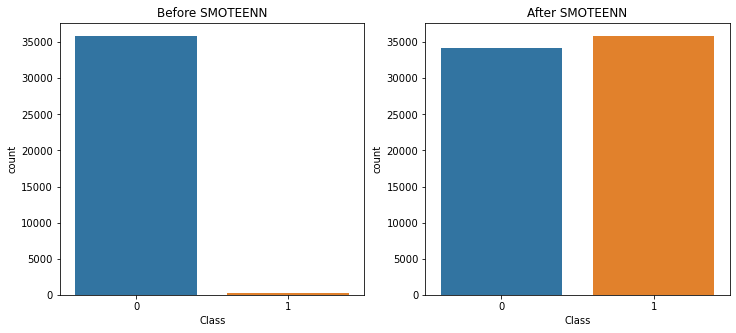

In [19]:
from imblearn.combine import SMOTEENN
# 1. Check class distribution BEFORE applying SMOTEENN
print("--- Before SMOTEENN ---")
original_counts = y_train.value_counts()
print(original_counts)

# 2. Apply SMOTEENN
# This can be computationally intensive, so it might take a moment
sme = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = sme.fit_resample(X_train, y_train)
print("\nSMOTEENN applied successfully.")

# 3. Check class distribution AFTER applying SMOTEENN
print("\n--- After SMOTEENN ---")
resampled_counts = y_train_resampled.value_counts()
print(resampled_counts)

# 4. Visualize the comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x=y_train, ax=axes[0]).set_title('Before SMOTEENN')
sns.countplot(x=y_train_resampled, ax=axes[1]).set_title('After SMOTEENN')
plt.show()

In [20]:
from sklearn.model_selection import RandomizedSearchCV

# Define your parameter grid (can be larger now)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, 30],
    'min_samples_leaf': [5, 10, 20]
}

model_rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Set up RandomizedSearchCV, n_iter is the number of combinations to try
# 10-20 iterations is often a good starting point
random_search = RandomizedSearchCV(estimator=model_rf, 
                                   param_distributions=param_grid,
                                   n_iter=10, # Try 10 random combinations
                                   scoring='balanced_accuracy', 
                                   cv=5, 
                                   n_jobs=-1, 
                                   random_state=42,
                                   verbose=2)

print("Starting randomized search...")
random_search.fit(X_train_resampled, y_train_resampled) # Use your training data

Starting randomized search...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


MemoryError: Unable to allocate 74.7 MiB for an array with shape (14007, 699) and data type float64

In [3]:
from sklearn.model_selection import GridSearchCV

# Assume X_train_resampled and y_train_resampled are from your SMOTE step
# Assume gkf is your GroupKFold object for cross-validation

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_leaf': [5, 10, 20]
}

model_rf = RandomForestClassifier(random_state=42)

# Note: We don't use groups here because the data is already split.
# GridSearchCV will use a standard K-Fold on the resampled training data.
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid,
                           scoring='balanced_accuracy', cv=5, n_jobs=-1, verbose=2)

print("Starting hyperparameter tuning...")
grid_search.fit(X_train_resampled, y_train_resampled)

print("Best parameters found: ", grid_search.best_params_)

# Evaluate the BEST model from the search
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = balanced_accuracy_score(y_test, y_pred)

print(f"\n✅ Tuned Model Balanced Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

NameError: name 'RandomForestClassifier' is not defined

In [49]:
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1,class_weight='balanced')
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [50]:
y_pred = model.predict(X_test)
accuracy = balanced_accuracy_score(y_test, y_pred)
    
print("\n--- Model Performance ---")
print(f"✅ Balanced Accuracy on Test Set: {accuracy:.4f}")
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))


--- Model Performance ---
✅ Balanced Accuracy on Test Set: 0.5000

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8804
           1       0.00      0.00      0.00       133

    accuracy                           0.99      8937
   macro avg       0.49      0.50      0.50      8937
weighted avg       0.97      0.99      0.98      8937



C:\Users\Garvit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Garvit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Garvit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Calculate scale_pos_weight: ratio of negative class to positive class
# This is the recommended way to handle imbalance in XGBoost
neg_count = y_train.value_counts()[0]
pos_count = y_train.value_counts()[1]
scale_pos_weight_value = neg_count / pos_count
groups_train = groups.iloc[train_idx] 
param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1]
}

model_xgb = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=scale_pos_weight_value, # Use this parameter
    n_estimators=100,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
grid_search_xgb = GridSearchCV(
    estimator=model_xgb,
    param_grid=param_grid_xgb,
    scoring='balanced_accuracy',
    cv=gkf, # Use your GroupKFold split
    n_jobs=-1,
    verbose=2
)
grid_search_xgb.fit(X_train, y_train, groups=groups_train)

print("Best parameters found: ", grid_search_xgb.best_params_)

# Get predictions from the best tuned model
best_model_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_model_xgb.predict(X_test)

# Report performance
accuracy_xgb = balanced_accuracy_score(y_test, y_pred_xgb)
print(f"\n✅ Tuned XGBoost Model Balanced Accuracy: {accuracy_xgb:.4f}")
print(classification_report(y_test, y_pred_xgb))


Fitting 5 folds for each of 18 candidates, totalling 90 fits


KeyboardInterrupt: 